In [3]:
import requests

import re
import nltk
import pandas as pd

In [57]:
movie_rev=pd.read_csv("IMDB_cleaned.csv")

In [9]:
movie_rev

,review,cleaned_review,sentiment
0,One of the other reviewers has mentioned that ...,one of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,a wonderful little production the filming tech...,positive
2,I thought this was a wonderful way to spend ti...,i thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,basically there is a family where a little boy...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter mattei s love in the time of money is a...,positive
...,...,...,...
4995,An interesting slasher film with multiple susp...,an interesting slasher film with multiple susp...,negative
4996,i watched this series when it first came out i...,i watched this series when it first came out i...,positive
4997,Once again Jet Li brings his charismatic prese...,once again jet li brings his charismatic prese...,positive
4998,"I rented this movie, after hearing Chris Gore ...",i rented this movie after hearing chris gore s...,negative


In [13]:
movie_rev.isna().sum()

review            0
cleaned_review    0
sentiment         0
dtype: int64

In [59]:
from wordcloud import WordCloud,STOPWORDS

In [61]:
import re

In [63]:
nltk.download("stopwords")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eagle\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\eagle\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [65]:
from nltk.corpus import stopwords
Stopwords=stopwords.words('english')

In [95]:
#Stopwords.append("movie")

In [97]:
def clean_text(text):
  text=re.sub("[^a-zA-Z" "]+"," ",text).lower()
  text=re.sub("[0-9" "]+"," ",text)
  words=[]
  for word in text.split(" "):
    if len(word)>3:
      words.append(word)
  w=[word for word in words if word not in Stopwords]
  return (" ".join(w))

In [99]:
movie_rev["cleaned_review"]=movie_rev["cleaned_review"].apply(clean_text)

In [105]:
review_para="".join(movie_rev["cleaned_review"])

In [ ]:
"""
viridis, plasma, inferno, magma
Blues, Reds, Greens, Purples
coolwarm, rainbow
"""

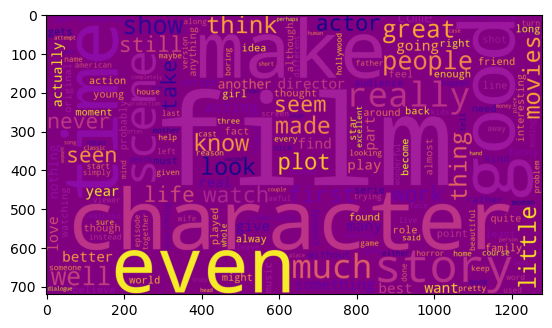

In [107]:
import matplotlib.pyplot as plt

word_cloud=WordCloud(
        background_color="purple",
        width=1280,
        height=720,
        colormap="plasma"
    ).generate(review_para)

plt.imshow(word_cloud)

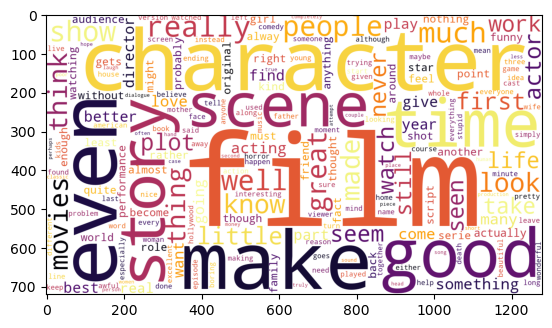

In [109]:
word_cloud=WordCloud(
        background_color="white",
        width=1280,
        height=720,
        colormap="inferno"
    ).generate(review_para)

plt.imshow(word_cloud)

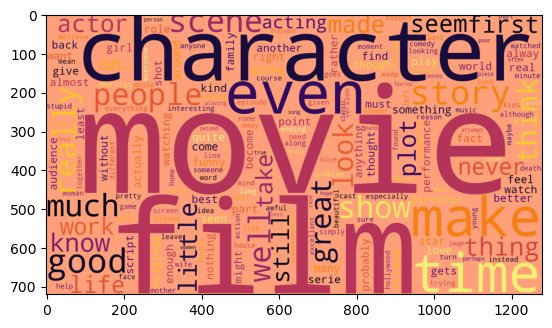

In [93]:
word_cloud=WordCloud(
        background_color="LightSalmon",
        width=1280,
        height=720,
        colormap="inferno"
    ).generate(review_para)

plt.imshow(word_cloud)

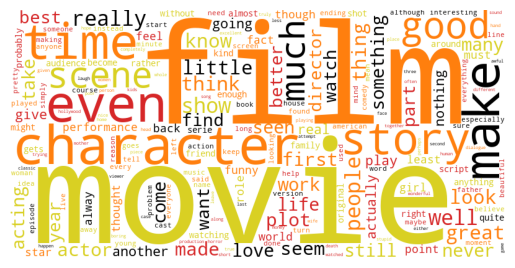

In [89]:
import random

def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    colors = ["#ff7f0e","#d62728", "#000000","#D9D023"]
    return random.choice(colors)

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    color_func=custom_color_func
).generate(review_para)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()
